Представим, что у нас есть небольшой онлайн-кинотеатр и мы хотим, чтобы пользователи были довольны и смотрели фильмы у нас, а не на других ресурсах. Создадим небольшую матрицу рейтингов наших фильмов, на основании оценок пользователей.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [26]:
#Названия фильмов
f = ['Терминатор', 'Робокоп', 'Рэмбо', 'Джеймс Бонд','Властелин Колец', 'Хоббит', 'Гарри Поттер', 
     'Американский Пирог', 'Мальчишник в Вегасе', 'Мстители', 'Супермен'] 

In [27]:
#Наши пользователи
u = ['Вася','Петя','Саша','Женя','Маша','Оля','Лена','Ваня','Ира']

In [28]:
#Рейтинг фильмов от пользователей. 0 - значит фильм не был просмотрен.
fu = np.array([[9,0,0,6,4,3,5,7,8,6,5],
              [0,0,0,8,10,0,8,5,6,2,0],
              [8,0,5,7,4,0,5,7,8,8,5],
              [5,2,0,4,10,0,9,5,0,0,0],
              [0,0,2,5,7,0,0,9,0,4,0],
              [2,3,0,0,0,7,9,0,5,0,3],
              [5,0,3,8,8,0,0,7,0,2,4],
              [8,7,0,6,5,4,0,8,0,10,0],
              [0,0,2,5,10,0,0,0,9,0,3]])

In [29]:
#Сделаем датафрейм из f,u и fu.
R = pd.DataFrame(fu,u,f)

In [30]:
R

Терминатор  Робокоп  Рэмбо  Джеймс Бонд  Властелин Колец  Хоббит  \
Вася           9        0      0            6                4       3   
Петя           0        0      0            8               10       0   
Саша           8        0      5            7                4       0   
Женя           5        2      0            4               10       0   
Маша           0        0      2            5                7       0   
Оля            2        3      0            0                0       7   
Лена           5        0      3            8                8       0   
Ваня           8        7      0            6                5       4   
Ира            0        0      2            5               10       0   

      Гарри Поттер  Американский Пирог  Мальчишник в Вегасе  Мстители  \
Вася             5                   7                    8         6   
Петя             8                   5                    6         2   
Саша             5                   7                    8         8   
Женя             9                   5                    0         0   
Маша             0                   9                    0         4   
Оля              9                   0                    5         0   
Лена             0                   7                    0         2   
Ваня             0                   8                    0        10   
Ира              0                   0                    9         0   

      Супермен  
Вася         5  
Петя         0  
Саша         5  
Женя         0  
Маша         0  
Оля          3  
Лена         4  
Ваня         0  
Ира          3

Вот теперь и встаёт вопрос, какой предложить фильм, чтобы наш пользователь хорошо провёл вечер? Немного поискав на просторах интернета, находим статью о том, что один большой онлнайн-кинотеатр **Netflix** в 2006 году объявил соревнование по разработке рекомендательной системы фильмов. За решение, которое улучшит качество рекомендаций на 10%, была объявлена награда в 1 млн долларов. В итоге в 2011 году такое решение было получено, а работало оно на основе **SVD** - Singular Value Decomposition.

### Немного линейной алгебры.
Смысл SVD состоит в том, что прямоугольную матрицу A мы можем разложить на 3 матрицы: U, Ʃ и V.

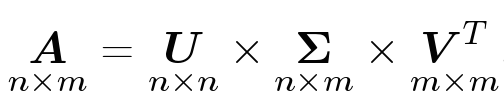

Матрицы U и V ортогональные, а Ʃ — диагональная (хотя и не квадратная). 

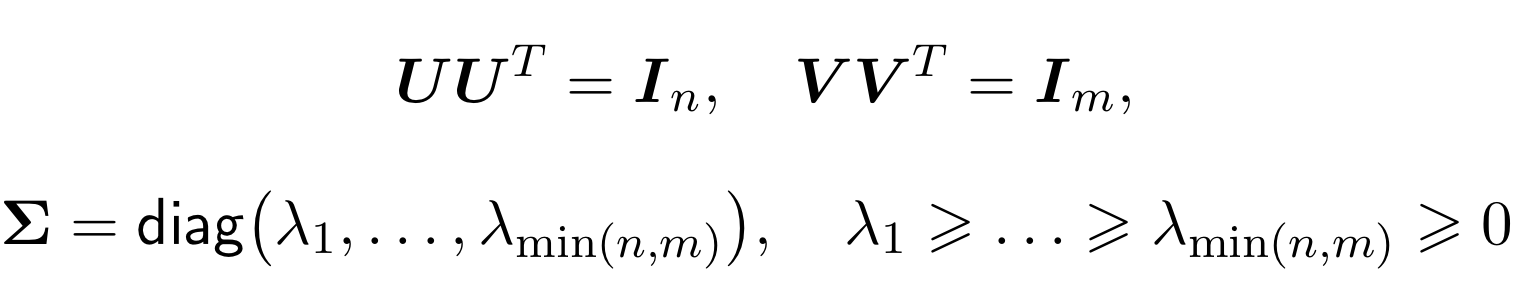

В случае разреженной матрицы, которой обычно является рейтинг фильмов, можно использовать усечённое разложение (truncated SVD), где мы оставляем только d первых чисел $\lambda$. В итоге получаем разложение матрицы A', которое хорошо приближает исходную матрицу A.

Теперь применим это к нашей рекомендательной системе. У нас есть матрица оценок R, давайте сделаем её сингулярное разложение.
Первые две матрицы перемножим, получим также матрицу $n$ x $d$, в итоге получится такое разложение.

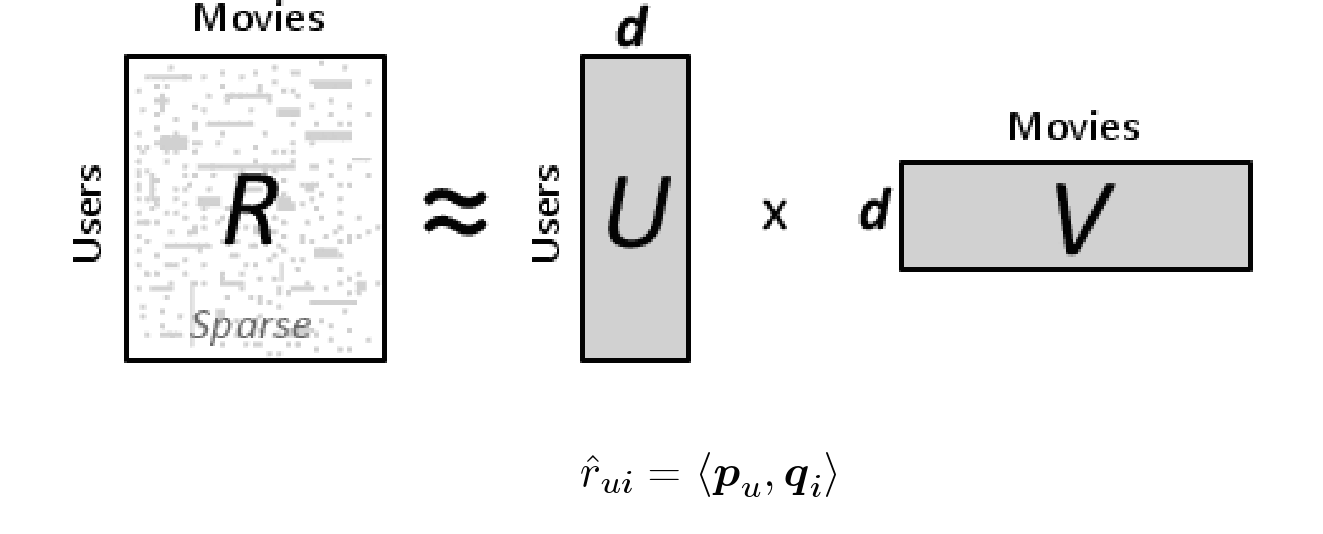

Размерность **d** в данном случае отвечает за количество скрытых свойств/интересов у наших пользователей и фильмов, $\hat r \tiny ui$ - рейтинг фильма, который мы получили перемножив матрицы **U** и **V**.

Таким образом, мы научились приближать исходную матрицу оценок матрицей, полученной на основе перемножения двух матриц, отвечающих за интересы пользователей и свойства фильмов. Но проблема в том, что матрица **R** у нас разреженная, и мы бы хотели бы как раз заполнить пустые (нулевые) элементы оценками пользователей.


Как же это сделать? Для этого нам нужно приблизить уже имеющиеся оценки числами, полученными в результате перемножения матриц $U$ и $V$. Тогда мы получим и оценки для нулей нашей исходной матрицы, т.е. нужно минимизировать такую функцию:

$$\large \frac{1}{n}\Sigma_{ui} (r {\tiny ui}-\hat r {\tiny ui})^{2} \to min,$$ где суммирование идёт по ненулевым индексам $u,i$ нашей исходной матрицы оценок, а $n$ - количество оценок в матрице.

Так это же задача регрессии с квадратичной функций потерь **MSE**. **MSE** выбрана по двум причинам: историческая, Netflix предложили метрику **RMSE** и она лучше оптимизируется градиентным спуском.

Функция потерь есть, метод оптимизации выбран, что забыли? Регуляризатор! Воспользуемся $L{\tiny 2}$-регуляризацией: 
$\large \lambda(\Sigma_{u}p {\tiny u}^{2} + \Sigma_{i}q {\tiny i}^{2})$
Осталось посчитать градиенты для реализации поиска минимума **MSE**. Воспользуемся стохастическим градиентным спуском, поэтому будем считать градиенты на одном объекте $\large r {\tiny ui}$ из матрицы оценок. В итоге получаем такие правила обновления элементов наших матриц **U** и **V**.

$\large 
{p_{u,j}=p_{u,j} + \large \gamma (r_{ui}-\hat r_{ui}) q_{i,j} - \lambda p_{u,j}}$


$\large {q_{i,j}=q_{i,j} + \large \gamma (r_{ui}-\hat r_{ui}) p_{u,j} - \lambda q_{i,j}}$

Индексы $u,i$ - номера пользователя и фильма в наших матрицах **U** (номер строки) и **V** (номер столбца), $j$ - $j$-ая компонента векторов $\large p_{u}$ и $\large q_{i}$.

Ну что же, теперь воспользуемся Питоном и сделаем рекомендации для наших пользователей!

In [31]:
def SVD(R,d,step,lambda_reg,n_iters):
    #инициализуем наши матрицы для разложения
    U = np.zeros((R.shape[0],d))
    V = np.zeros((d,R.shape[1]))
    #начальные элементы матрица U и V будут средним рейтингом по ненулевым оценкам
    mu = R.sum()/(R!=0).sum()
    non_zero = (R!=0).sum()
    U = U + mu
    V = V + mu
    # Создадим списки, где будут индексы нулевых и ненулевых элементов матрицы R
    indx=[]
    zero_indx = []
    # Инициализируем MSE в начале и будем отслеживать в процессе обучения
    MSE_start = 0
    MSE=[]
    # Найдём индексы нулевых и ненулевых элементов
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if R[i][j]>0:
                indx.append([i,j])
                MSE_start+=((R[i,j]-np.dot(U[i,:],V[:,j])) ** 2) / non_zero
            else:
                zero_indx.append([i,j])
    # Сделаем градиентный спуск            
    for n in range(n_iters):
        choice = np.random.randint(0,len(indx))
        ij = indx[choice]
        for k in range(0,d):
            U[ij[0],k] = U[ij[0],k] + step * ((R[ij[0]][ij[1]] - 
                                               np.dot(U[ij[0],:],V[:,ij[1]])) * V[k,ij[1]] - 
                                              lambda_reg * U[ij[0],k])
            V[k,ij[1]] = V[k,ij[1]] + step * ((R[ij[0]][ij[1]] - 
                                               np.dot(U[ij[0],:],V[:,ij[1]])) * U[ij[0],k] - 
                                              lambda_reg * V[k,ij[1]])
            
        L=0
        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                if R[i,j]>0:
                    L+=((R[i,j]-np.dot(U[i,:],V[:,j])) ** 2)/non_zero
        MSE.append(L)    
    return U,V, MSE_start, MSE

In [32]:
A,B,M_1,M_end = SVD(R.values,2,0.01,0.1,3000)

In [33]:
A

array([[ 1.18937288,  0.51323638],
       [-0.74303211,  2.34965866],
       [ 1.25738457,  0.52022559],
       [-1.0587231 ,  2.45947696],
       [-0.45955225,  1.89059394],
       [-1.21619381,  2.36156515],
       [-0.48053045,  2.12938394],
       [ 1.12789149,  0.78909417],
       [-0.65781162,  2.48367353]])

In [34]:
B

array([[4.98831071, 5.34957665, 4.233355  , 3.64231384, 1.51296298,
        1.96004524, 3.33823749, 3.64747128, 4.76597217, 5.1956835 ,
        3.16813961],
       [3.85062523, 3.53019816, 2.31574998, 3.84954516, 4.36575517,
        3.59450933, 5.00786444, 4.02582532, 4.54338169, 2.84463429,
        2.5274718 ]])

In [35]:
r_cap = np.zeros((R.shape[0],R.shape[1]))
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        r_cap[i,j]=np.dot(A[i,:],B[:,j])

In [36]:
R

Терминатор  Робокоп  Рэмбо  Джеймс Бонд  Властелин Колец  Хоббит  \
Вася           9        0      0            6                4       3   
Петя           0        0      0            8               10       0   
Саша           8        0      5            7                4       0   
Женя           5        2      0            4               10       0   
Маша           0        0      2            5                7       0   
Оля            2        3      0            0                0       7   
Лена           5        0      3            8                8       0   
Ваня           8        7      0            6                5       4   
Ира            0        0      2            5               10       0   

      Гарри Поттер  Американский Пирог  Мальчишник в Вегасе  Мстители  \
Вася             5                   7                    8         6   
Петя             8                   5                    6         2   
Саша             5                   7                    8         8   
Женя             9                   5                    0         0   
Маша             0                   9                    0         4   
Оля              9                   0                    5         0   
Лена             0                   7                    0         2   
Ваня             0                   8                    0        10   
Ира              0                   0                    9         0   

      Супермен  
Вася         5  
Петя         0  
Саша         5  
Женя         0  
Маша         0  
Оля          3  
Лена         4  
Ваня         0  
Ира          3

In [37]:
R_cap = pd.DataFrame(r_cap,u,f)

In [38]:
R_cap

Терминатор   Робокоп     Рэмбо  Джеймс Бонд  Властелин Колец    Хоббит  \
Вася    7.909242  8.174468  6.223565     6.307796         4.040142  4.176058   
Петя    5.341180  4.319853  2.295703     6.338761         9.133854  6.989493   
Саша    8.275419  8.562975  6.527668     6.582421         4.173554  4.334486   
Женя    4.189284  3.018721  1.213583     5.611666         9.135665  6.765468   
Маша    4.987579  4.215761  2.432695     5.604093         7.558585  5.895014   
Оля     3.026750  1.830671  0.320214     4.661192         8.469959  6.104873   
Лена    5.802424  4.946513  2.896865     6.446917         8.569344  6.712229   
Ваня    8.664779  8.819401  6.602110     7.145788         5.151450  5.047125   
Ира     6.282327  5.248846  2.966817     7.165057         9.847866  7.638247   

      Гарри Поттер  Американский Пирог  Мальчишник в Вегасе  Мстители  \
Вася      6.540627            6.404403             8.000347  7.639575   
Петя      9.286354            6.749127             7.134126  2.823360   
Саша      6.802668            6.680611             8.356243  8.012824   
Женя      8.782458            6.039763             6.128498  1.495522   
Маша      7.933744            5.934997             6.399477  2.990360   
Оля       7.766454            5.071217             4.933146  0.398831   
Лена      9.059541            6.819807             7.384409  3.560634   
Ваня      7.716846            7.290707             8.960655  8.104852   
Ира      10.241969            7.599487             8.149165  3.647362   

      Супермен  
Вася  5.065290  
Петя  3.584667  
Саша  5.298425  
Женя  2.862076  
Маша  3.322497  
Оля   2.115718  
Лена  3.859570  
Ваня  5.567731  
Ира   4.193376

In [39]:
print ('Start MSE:',M_1,'Finish MSE:',M_end[-1])

Start MSE: 4065.7950666666675 Finish MSE: 1.18979539511387


In [40]:
print ('Start RMSE',np.sqrt(M_1),'Finish RMSE',np.sqrt(M_end[-1]))

Start RMSE 63.76358731020917 Finish RMSE 1.0907774269363435


In [41]:
n = (R.values != 0).sum()

In [42]:
L=0
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if R.values[i,j]>0:
            L+=((R.values[i,j]-R_cap.values[i,j]) ** 2)/n

In [43]:
L

1.18979539511387

В итоге получили матрицу оценок с помощью SGD. Как видно, MSE сильно упал. Можно поиграться с параметрами, чтобы настроить качество. Как итог, выбираем фильмы с наибольшей оценкой и рекомендуем их пользователям! :) 

#### Домашнее задание 11 november

    - выбрать item-based/user-based подход для работы с датасетом
    - реализовать модель подсчета рейтинга с использованием кластеризации (количество кластеров обосновать)
    - посчитать рейтинги с помощью матричной факторизации SVD/NMF
    - сравнить три способа (имеющийся с корреляцией Пирсона, кластеризация, матричная факторизация)

В заключение хочется сказать, что есть хорошая библиотека Surprise, где можно делать рекомендации проще, быстрее и различными способами.
Оставлю ссылку для ознакомления http://surpriselib.com/